In [1]:
# Deep Learning with Python Ch5: cats vs. dogs example
# group images to training, validation, and test directories
import os, shutil

# where the original data are stored
original_data_dir = 'C:\\Users\\Carol\\Desktop\\dogs-vs-cats\\images'

# create directories 
# where the sorted data will be stored
base_dir = 'C:\\Users\\Carol\\Desktop\\DL05'
os.mkdir(base_dir)

# where training data will be stored
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
# where validation data will be stored
val_dir = os.path.join(base_dir, 'validation')
os.mkdir(val_dir)
# where test data will be stored
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# where training cat images will be stored
train_cat_dir = os.path.join(train_dir, 'cat')
os.mkdir(train_cat_dir)
# where training dog images will be stored
train_dog_dir = os.path.join(train_dir, 'dog')
os.mkdir(train_dog_dir)

# where validation cat images will be stored
val_cat_dir = os.path.join(val_dir, 'cat')
os.mkdir(val_cat_dir)
# where validation dog images will be stored
val_dog_dir = os.path.join(val_dir, 'dog')
os.mkdir(val_dog_dir)

# where test cat images will be stored
test_cat_dir = os.path.join(test_dir, 'cat')
os.mkdir(test_cat_dir)
# where test dog images will be stored
test_dog_dir = os.path.join(test_dir, 'dog')
os.mkdir(test_dog_dir)

In [2]:
# copy images into their respective directories
# 1st 1,000 cat images to train_cat_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_data_dir, fname)
    dst = os.path.join(train_cat_dir, fname)
    shutil.copyfile(src, dst)

# next 500 cat images to val_cat_dir   
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_data_dir, fname)
    dst = os.path.join(val_cat_dir, fname)
    shutil.copyfile(src, dst)

# last 500 cat images to test_cat_dir   
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_data_dir, fname)
    dst = os.path.join(test_cat_dir, fname)
    shutil.copyfile(src, dst)

# 1st 1,000 dog images to train_dog_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_data_dir, fname)
    dst = os.path.join(train_dog_dir, fname)
    shutil.copyfile(src, dst)

# next 500 dog images to val_dog_dir   
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_data_dir, fname)
    dst = os.path.join(val_dog_dir, fname)
    shutil.copyfile(src, dst)

# last 500 dog images to test_dog_dir   
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_data_dir, fname)
    dst = os.path.join(test_dog_dir, fname)
    shutil.copyfile(src, dst)

In [3]:
# sanity check: total # of images in each diectory
print('total training cat images:', len(os.listdir(train_cat_dir)))
print('total validation cat images:', len(os.listdir(val_cat_dir)))
print('total test cat images:', len(os.listdir(test_cat_dir)))

print('total training dog images:', len(os.listdir(train_dog_dir)))
print('total validation dog images:', len(os.listdir(val_dog_dir)))
print('total test dog images:', len(os.listdir(test_dog_dir)))

total training cat images: 1000
total validation cat images: 500
total test cat images: 500
total training dog images: 1000
total validation dog images: 500
total test dog images: 500


In [1]:
# put all file locations together, so we can run this cell 
# if we log out and come back later
import os

base_dir      = 'C:\\Users\\Carol\\Desktop\\DL05'
train_dir     = os.path.join(base_dir, 'train')
val_dir       = os.path.join(base_dir, 'validation')
test_dir      = os.path.join(base_dir, 'test')
train_cat_dir = os.path.join(train_dir, 'cat')
train_dog_dir = os.path.join(train_dir, 'dog')
val_cat_dir   = os.path.join(val_dir, 'cat')
val_dog_dir   = os.path.join(val_dir, 'dog')
test_cat_dir  = os.path.join(test_dir, 'cat')
test_dog_dir  = os.path.join(test_dir, 'dog')

In [6]:
# Approach 1: use a network w/ convnet
# build network
from keras import layers, models, optimizers

model = models.Sequential()
# add convnet: arbitrary input size choice (150 x 150), 3 cuz RGB image
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

# add classifier
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

# configure network
model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [7]:
# preprocess data
from keras.preprocessing.image import ImageDataGenerator

# use ImageDataGenerator to read images from directories
# 255 cuz pixel values range from 0 to 255
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen  = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')
val_generator   = test_datagen.flow_from_directory(val_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
# fit network
# each epoch should cover all the training data points, so 
# batch_size x steps_per_epoch = total # of training data points
# here: 20 x 100 = 2,000 images (1,000 cats + 1,000 dogs)
# the same logic applies to validation data
# here: 20 x 50 = 1,000 images (500 cats + 500 dogs)
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, 
                              validation_data=val_generator, validation_steps=50, verbose=0)

# save network
model.save('cat_dog_model_1.h5')

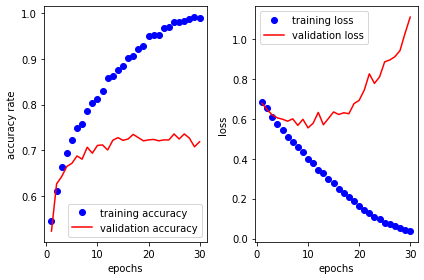

In [9]:
# plot loss and accuracy
%matplotlib inline
import matplotlib.pyplot as plt

acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(1, len(acc)+1)

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='training accuracy')
plt.plot(epochs, val_acc, 'r', label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy rate')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.tight_layout()
plt.show()

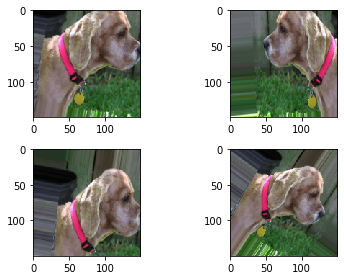

In [10]:
# Approach 2: use a convnet network w/ data augmentation and dropout
# setup a data augmentation
aug_datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, 
                                 shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

# show some randomly augmented images
from keras.preprocessing import image

train_dog_dir = os.path.join(train_dir, 'dog')

fnames   = [os.path.join(train_dog_dir, fname) for fname in os.listdir(train_dog_dir)]
img_path = fnames[5] # pick the image to augment

# read the image and resize it to (150 x 150)
img = image.load_img(img_path, target_size=(150,150)) 
# convert the image to a numpy array of shape(150, 150, 3)
x   = image.img_to_array(img)
# reshape the array to (1, 150, 150, 3)
x   = x.reshape((1,) + x.shape)

# plot 4 augmented images
i = 0
# generate batchs of augmented images indefinitely
for batch in aug_datagen.flow(x, batch_size=1):
    plt.subplot(2, 2, i+1)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i == 4:
        break # break the loop
plt.tight_layout()
plt.show()

In [12]:
from keras import layers, models, optimizers

# define network
model = models.Sequential()
# add convnet: arbitrary input size choice (150 x 150), 3 cuz RGB image
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

# add classifier
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # dropout layer added
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# configure network
model.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])

# preprocess data
# setup a data augmentation for training
train_datagen = ImageDataGenerator(rescale=1/255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, 
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
# Don't augment validation data!
test_datagen  = ImageDataGenerator(rescale=1/255) 

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=32, class_mode='binary')
val_generator   = test_datagen.flow_from_directory(val_dir, target_size=(150,150), batch_size=32, class_mode='binary')

# fit network
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, 
                              validation_data=val_generator, validation_steps=50, verbose=0)

# save network
model.save('cat_dog_model_2.h5')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


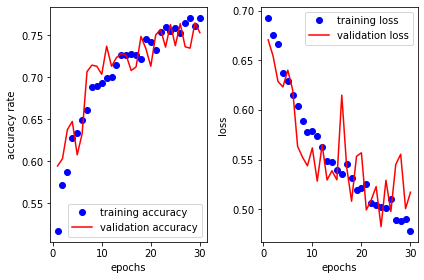

In [13]:
# plot loss and accuracy
import matplotlib.pyplot as plt

acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(1, len(acc)+1)

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='training accuracy')
plt.plot(epochs, val_acc, 'r', label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy rate')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
# visualize intermediate activations
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image

# load our 2nd cat-dog model 
model = load_model('cat_dog_model_2.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

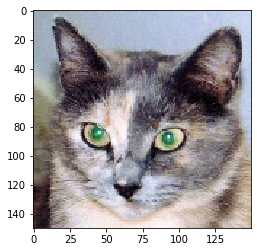

In [15]:
# show an original test image
test_cat_dir = os.path.join(test_dir, 'cat')
img_path     = os.path.join(test_cat_dir, 'cat.1700.jpg')

# read the image and resize it to (150 x 150)
img = image.load_img(img_path, target_size=(150,150)) 
# convert the image to a numpy array of shape(150, 150, 3)
x   = image.img_to_array(img)
# reshape the array to (1, 150, 150, 3)
x   = np.expand_dims(x, axis=0)
# rescale to how the model was trained
x  /= 255

# plot the image
plt.imshow(x[0])
plt.show()

In [17]:
# define variables
from keras import models

# extract outputs of the top 8 layers of the model
layer_outputs    = [layer.output for layer in model.layers[:8]]
# initiate a model that returns these outputs given the model input
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
# return a list of arrays: 1 per layer
activations      = activation_model.predict(x)

# check the shape of the array
print('layer 1:', activations[0].shape)
print('layer 2:', activations[1].shape)
print('layer 8:', activations[7].shape)

layer 1: (1, 148, 148, 32)
layer 2: (1, 74, 74, 32)
layer 8: (1, 7, 7, 128)


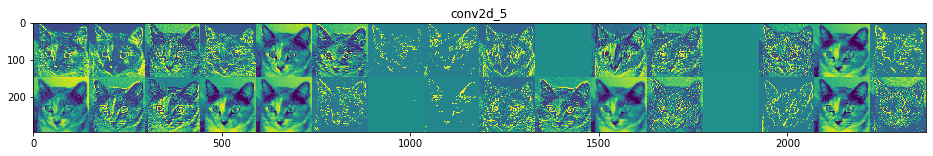

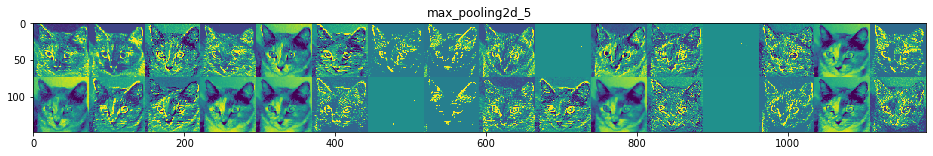

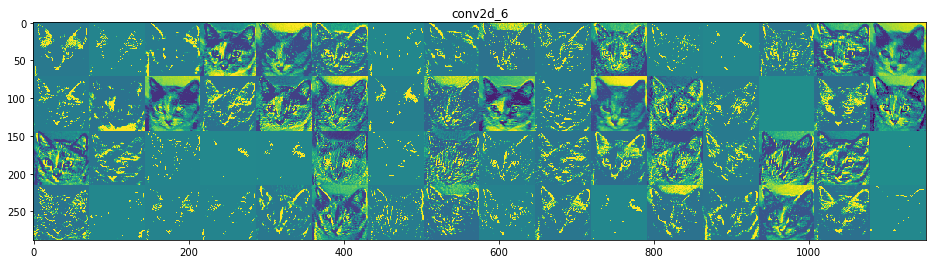

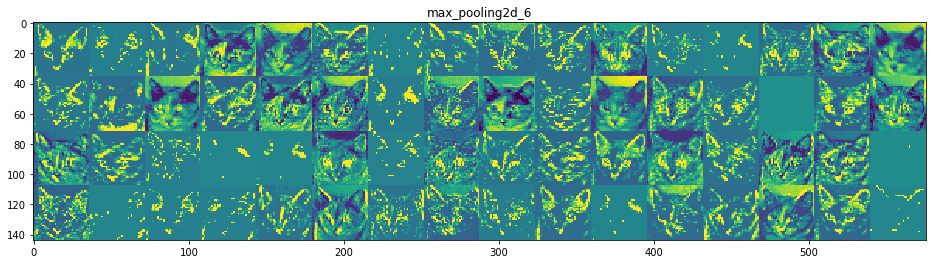

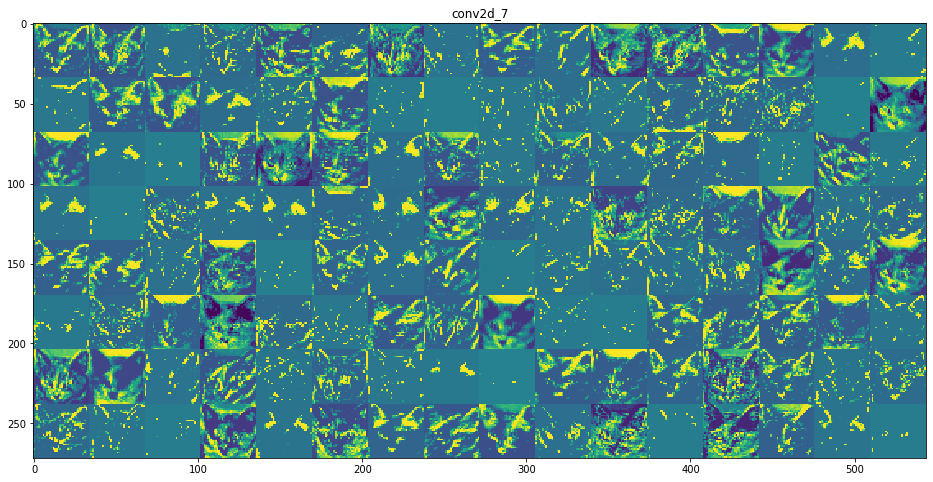

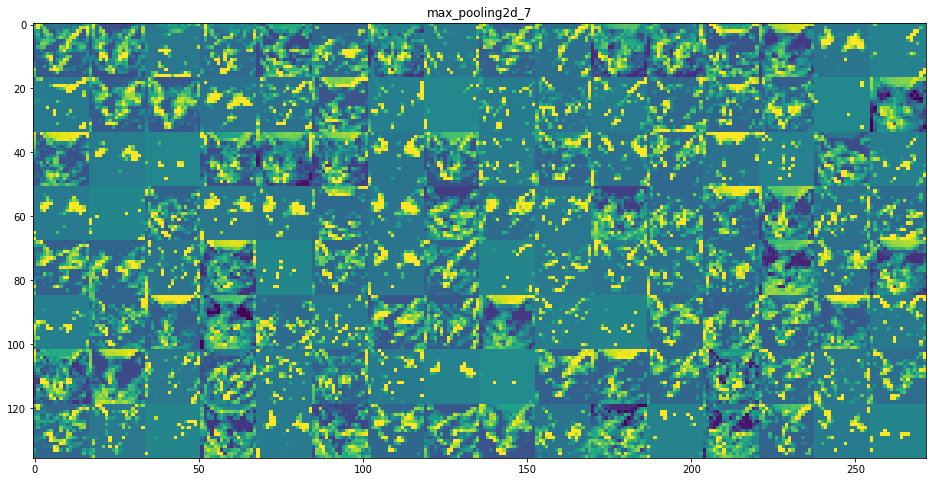

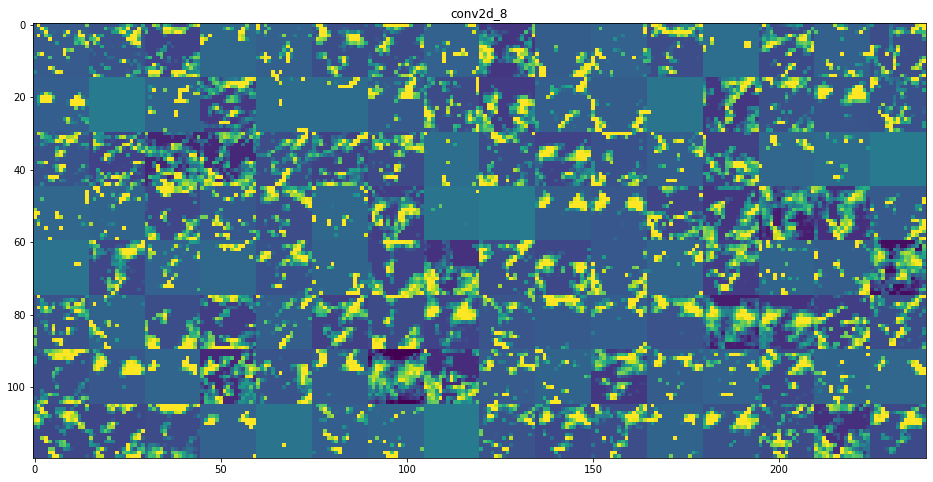

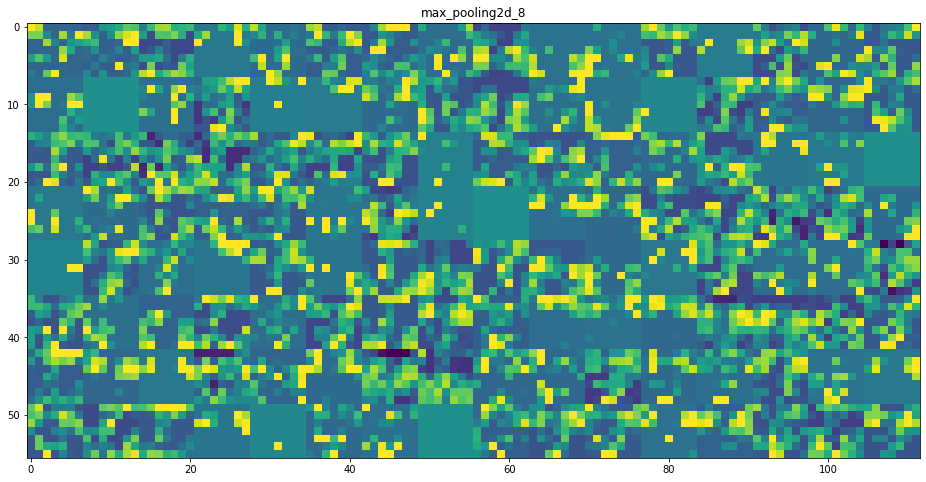

In [20]:
# plot intermediate activations
# get each layer name of the top 8 layers
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
images_per_row = 16

# visualize every feature in each intermediate activation
for layer_name, layer_activation in zip(layer_names, activations):
    # shape of feature map: (layer, size, size, n_features)
    n_features = layer_activation.shape[-1]    # # of features in the feature map
    size       = layer_activation.shape[1]     # size of each feature   
    n_cols     = n_features // images_per_row  # # of columns: each feature shown in an image
    dis_grid   = np.zeros((n_cols*size, images_per_row*size))
    
    for col in range(n_cols):
        for row in range(images_per_row):
            # postprocess each feature to make it visually palatable
            feature_image  = layer_activation[0, :, :, col*images_per_row+row]
            feature_image  = (feature_image-feature_image.mean()) / (feature_image.std()+1e-6)
            feature_image *= 64
            feature_image += 128
            # limit values to 0~255, the typical pixel values
            feature_image  = np.clip(feature_image, 0, 255).astype('uint8')
            # record each feature in the display grid
            dis_grid[col*size : (col+1)*size, row*size : (row+1)*size] = feature_image
    
    scale = 1/size
    plt.figure(figsize=(scale*dis_grid.shape[1], scale*dis_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(dis_grid, aspect='auto', cmap='viridis')

In [3]:
# Approach 3: use a network w/ pretrained convnet but no augmentation
# initiate a pretrained convnet called VGG16
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

# fast feature extraction w/o augmentation
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# set up a fn that records the outputs from conv_base in a numpy array
datagen    = ImageDataGenerator(rescale=1/255)
batch_size = 20

def extract_features(directory, sample_count):
    features  = np.zeros(shape=(sample_count, 4, 4, 512)) # output shape of the last layer of conv_base
    labels    = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory, target_size=(150,150), batch_size=batch_size, class_mode='binary')
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch                            = conv_base.predict(inputs_batch) # run my data thru conv_base
        features[i*batch_size : (i+1)*batch_size] = features_batch   
        labels[i*batch_size : (i+1)*batch_size]   = labels_batch
        
        i += 1
        if i*batch_size >= sample_count:
            break
    return features, labels

# apply feature extraction fn to data
train_features, train_labels = extract_features(train_dir, 2000)
val_features,   val_labels   = extract_features(val_dir, 1000)
test_features,  test_labels  = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
# reshape output data for the classifier
train_features = np.reshape(train_features, (2000, 4*4*512))
val_features   = np.reshape(val_features, (1000, 4*4*512))
test_features  = np.reshape(test_features, (1000, 4*4*512))

# build, configure and train network
from keras import layers, models, optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

history = model.fit(train_features, train_labels, epochs=30, batch_size=20, 
                    validation_data=(val_features, val_labels), verbose=0)

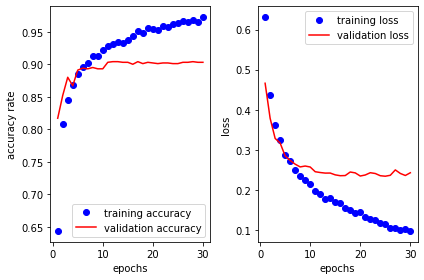

In [7]:
# plot loss and accuracy
%matplotlib inline
import matplotlib.pyplot as plt

acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(1, len(acc)+1)

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='training accuracy')
plt.plot(epochs, val_acc, 'r', label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy rate')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
# Approach 4: use a network w/ pretrained convnet and augmentation
# build and configure network
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# freeze weights in conv_base layers
print('# of trainable wieghts before freezing:', len(model.trainable_weights))
conv_base.trainable = False
print('# of trainable wieghts after freezing:', len(model.trainable_weights))

# configure network
model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

# of trainable wieghts before freezing: 10
# of trainable wieghts after freezing: 4


In [11]:
# slow feature extraction w/ augmentation
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, 
                                   shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
# Don't augment validation data!
test_datagen  = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')
val_generator   = test_datagen.flow_from_directory(val_dir, target_size=(150,150), batch_size=20, class_mode='binary')

# fit network
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, 
                              validation_data=val_generator, validation_steps=50, verbose=0)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


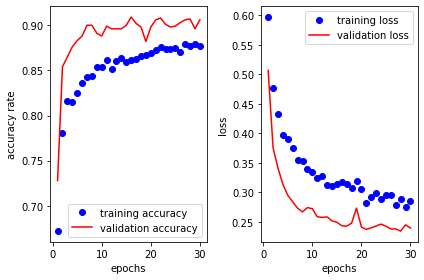

In [13]:
# plot loss and accuracy
import matplotlib.pyplot as plt

acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(1, len(acc)+1)

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='training accuracy')
plt.plot(epochs, val_acc, 'r', label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy rate')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.tight_layout()
plt.show()

In [14]:
# Approach 5: use a network w/ pretrained convnet and fine tuning
# freeze weights up till the last 3 conv_base layers
print('# of trainable wieghts before fine tuning:', len(model.trainable_weights))

conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

print('# of trainable wieghts after fine tuning:', len(model.trainable_weights))

# configure network
model.compile(optimizer=optimizers.RMSprop(lr=1e-5), loss='binary_crossentropy', metrics=['acc'])

# set up training and validation data generators
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen  = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')
val_generator   = test_datagen.flow_from_directory(val_dir, target_size=(150,150), batch_size=20, class_mode='binary')

# fit network
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100, 
                              validation_data=val_generator, validation_steps=50, verbose=0)

# of trainable wieghts before fine tuning: 4
# of trainable wieghts after fine tuning: 10
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


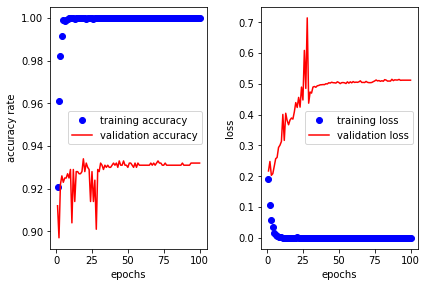

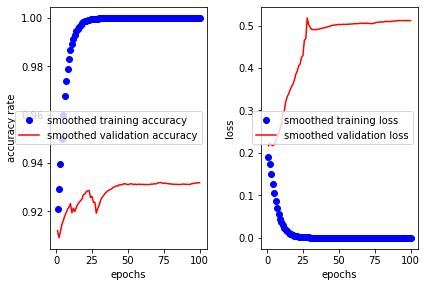

In [25]:
# plot loss and accuracy
import matplotlib.pyplot as plt

# original
acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']
epochs   = range(1, len(acc)+1)

plt.figure(1)
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='training accuracy')
plt.plot(epochs, val_acc, 'r', label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy rate')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)
plt.show()

# smoothed
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points: # if smoothed_points has elements
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor + point*(1-factor))
        else: # if smoothed_points is empty
            smoothed_points.append(point)
    return smoothed_points

plt.figure(2)
plt.subplot(1, 2, 1)
plt.plot(epochs, smooth_curve(acc), 'bo', label='smoothed training accuracy')
plt.plot(epochs, smooth_curve(val_acc), 'r', label='smoothed validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy rate')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, smooth_curve(loss), 'bo', label='smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'r', label='smoothed validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.5, wspace=0.35)
plt.show()

In [26]:
# apply fine-tunned model to test data
test_generator = test_datagen.flow_from_directory(test_dir, target_size=(150,150), batch_size=20, class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test accuracy:', test_acc)

Found 1000 images belonging to 2 classes.
test accuracy: 0.9299999916553497


In [3]:
# visualize convnet filters
import numpy as np
from keras.applications import VGG16
from keras import backend as K

# select filter 0 in block3_conv1 layer of the VGG16 network
model        = VGG16(weights='imagenet', include_top=False)
layer_name   = 'block3_conv1'
filter_index = 0
layer_output = model.get_layer(layer_name).output

# define a loss fn that maxmizes the value of the filter
loss = K.mean(layer_output[:, :, :, filter_index])

# get the gradients of the loss w.r.t. the input
grads  = K.gradients(loss, model.input)[0]
# normalize the gradients using its L2 norm
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

# given an input image, compute its loss and gradients
# inistiate the function defined above
iterate = K.function([model.input], [loss, grads])

# loss maximization via gradient ascent
# initiate a gray image with some noise
np.random.seed(1234)
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128

step     = 1   # magnitude of each gradient update
step_num = 40  # total # of steps taken
for i in range(step_num):
    loss_value, grads_value = iterate([input_img_data])
    # adjust image in the direction that maximizes the loss
    input_img_data += grads_value * step

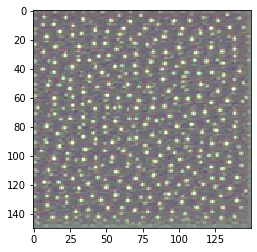

In [4]:
# preprocess image data 
def process_image(x):
    # center 0 and std 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1
    
    # limit to 0~1
    x += 0.5
    x  = np.clip(x, 0, 1)
    
    # convert to RGB 
    x *= 255
    x  = np.clip(x, 0, 255).astype('uint8')
    return x

# plot filter
%matplotlib inline
import matplotlib.pyplot as plt

processed_img = process_image(input_img_data[0])
plt.imshow(processed_img)

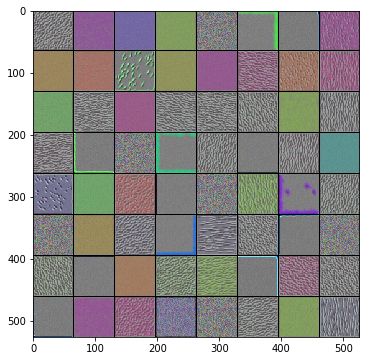

In [7]:
# visualize all filters in a layer
def gen_pattern(layer_name, filter_index, size=150):
    # extract filter
    layer_output = model.get_layer(layer_name).output
    
    # define a loss fn that maxmizes the value of the filter
    loss = K.mean(layer_output[:, :, :, filter_index])

    # get the gradients of the loss w.r.t. the input
    grads  = K.gradients(loss, model.input)[0]
    # normalize the gradients using its L2 norm
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    # given an input image, compute its loss and gradients
    # inistiate the function defined above
    iterate = K.function([model.input], [loss, grads])

    # initiate a gray image with some noise
    np.random.seed(1234)
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128
    
    # loss maximization via gradient ascent
    step     = 1   # magnitude of each gradient update
    step_num = 40  # total # of steps taken
    for i in range(step_num):
        loss_value, grads_value = iterate([input_img_data])
        # adjust image in the direction that maximizes the loss
        input_img_data += grads_value * step
        
    img = input_img_data[0]
    return process_image(img)

# plot
layer_name = 'block1_conv1' # this layer has 64 features (or filters)

# initiate an empty (8 x 8) RGB image grid to store results
size   = 64
margin = 2
res    = np.zeros((8*size+7*margin, 8*size+7*margin, 3))

# record each image in its location of the grid
for i in range(8):
    for j in range(8):
        filter_img = gen_pattern(layer_name, i+(j*8), size=size)
        
        horizontal_start = i*size + i*margin
        horizontal_end   = horizontal_start + size
        vertical_start   = j*size + j*margin
        vertical_end     = vertical_start + size
        res[horizontal_start:horizontal_end, vertical_start:vertical_end, :] = filter_img

plt.figure(figsize=(6,6))
plt.imshow(res.astype(int))